# Derivation of the invariant Euler Lagrange equations for SE(2) invariant Lagrangians defined over two-dimensional framed curves
<br/>

This notebook is dedicated to providing the calculations that go into deriving the invariant Euler Lagrange equations for SE(2) invariant Lagrangians defined over two-dimensional framed curves.  We will rely heavily on the LieSympy module, which was also written by this author.  For the two dimensional case, we can initialize a group action object using the Lie Sympy module and use the attributes of the object to provide many of the ingredients for our derivation.  At times, we will also invoke various methods that provide additional information.

We begin this process by first importing the necessary modules for our work.

<br/>

In [1]:
from sympy import *
from itertools import *
import LieSympy as lp
import numpy as np
init_printing()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Initialized the Group Action Object
<br/>
We start by initializing a group action object.  The class groupAction as defined in the LieSympy module is initialized by providing a set of coordinates for $X\times U$, a set of coordinates for $G$, and a parameter $n$ that represents the highest order jet space needed for the calculations.  There is certainly a minimal accepted value of $n$, but choosing an $n$ that is larger than the minimal value will not change any calculations.  However, it will increase the memory required to store group action objects.
<br/>

After initializing the group action object, we invoke a method named Def_transformation().  This method takes three arguements, these being, the expression for the group action (provided as sympy expressions in a list T), a group identity (provided by a list of numbers), and a cross-section, K, (provided as a list of two lists, one being the coordinate functions, and the other being the values of these functions on the cross-section).

<br/>
The def_transformation() method assigns many attributes to the group action object including:

* A list of infinitesimal generators
* The moving frame
* The recurrence relations for differential invariants
* Various substitution dictionaries required for calculations 

<br/>

In [2]:
g = lp.groupAction([['x'],['u','P']],['a','b','psi'],2)

# Define the expressions in terms of variables in the lp module
X_expr = cos(lp.psi)*lp.x-sin(lp.psi)*lp.u+lp.a
U_expr =  sin(lp.psi)*lp.x+cos(lp.psi)*lp.u+lp.b
P_expr = lp.P+lp.psi

# Define the group transformation, identity, and cross-section
T = [X_expr, U_expr, P_expr]
grp_id = [0,0,0]
K = [[0,0,0],[lp.x,lp.u,lp.P]]

# Add defining properties to the group action object
g.Def_transformation(T,grp_id,K)

# Run the moving frame analysis on the group action object
g.Apply_Frame_Analysis()

# Attributes of the group action object
<br/>
The following lines of code display several key attributes of the group action object.  The attributes that are displayed below play an important role in deriving the invariant Euler-Lagrange equations for our problem.

<br/>

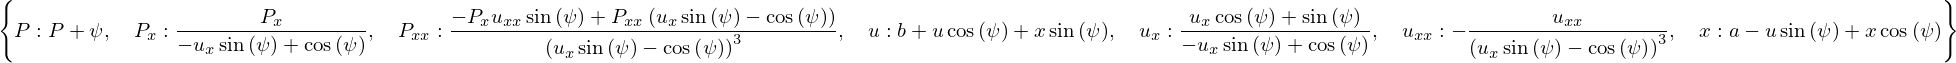

In [3]:
g.transformed_subs_backward

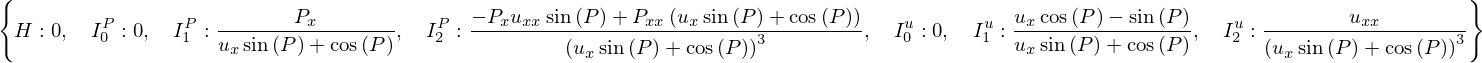

In [4]:
g.normals

In [5]:
g.frame

In [6]:
g.vectors

In [7]:
g.mc_invariants

In [8]:
g.rec_forms

In [9]:
g.contact_reduction

# Prolongation of Infinitesimal Generators

In [10]:
g.Prolong(g.vectors[0],2)

In [11]:
g.Prolong(g.vectors[1],2)

In [12]:
g.Prolong(g.vectors[2],2)

# Invariantization of the of Contact Forms
<br/>
The following are calculations of the Lie derivatives of the contact forms $\theta^\alpha_i$ by $v_j$.  The method Lie_contact_diff() gives us

<br/>

In [13]:
g.Lie_contact_diff(g.vectors[0], 0, 0)

In [14]:
g.Lie_contact_diff(g.vectors[0], 1, 0)

In [15]:
g.Lie_contact_diff(g.vectors[1], 0, 0)

In [16]:
g.Lie_contact_diff(g.vectors[1], 1, 0)

In [17]:
g.Lie_contact_diff(g.vectors[2], 0, 0)

In [18]:
g.Lie_contact_diff(g.vectors[2], 1, 0)

In [19]:
g.Lie_contact_diff(g.vectors[2], 0, 1)

# Derivation of the Invariant Eulerian and Hamiltonian Operators $\mathcal{A}^*$ and $\mathcal{B}^*$ 

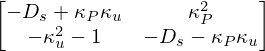

In [20]:
g.inv_Euler()

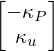

In [21]:
g.invariant_Hamilton()

# Derivation of the W term

In [33]:
lp.Prolong([['x'],['y','u','p1','p2','p3']],[-symbols('y'),symbols('x'),0,1,0,0],1)